# Assignment

In [24]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [26]:
losses = []
for encoding_dim in range(2, 18, 2):
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)


    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded, name=f"autoencoder_encoding_dim_{encoding_dim}")

    autoencoder.summary()

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    history = autoencoder.fit(xtrain, xtrain, epochs=20, batch_size=128, verbose=1, validation_data=(xtest, xtest))

    loss = min(history.history['loss'])
    losses.append(loss)
losses

Model: "autoencoder_encoding_dim_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 2)                 258       
                                                                 
 dense_21 (Dense)            (None, 128)               384       
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 784)

[0.17252157628536224,
 0.1547769457101822,
 0.12327578663825989,
 0.11653556674718857,
 0.10386751592159271,
 0.10437078773975372,
 0.10057613998651505,
 0.0921078696846962]

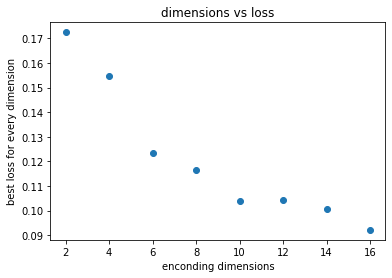

In [28]:
# Plot the 8 pairs of dimensions vs loss on a scatter plot
dims = list(range(2, 18, 2))
plt.scatter(dims, losses)
plt.xlabel("enconding dimensions")
plt.ylabel("best loss for every dimension")
plt.title("dimensions vs loss")
plt.show()



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [31]:
# utils
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [32]:
# add random noise
xtrain_noise = noise(xtrain)
xtest_noise = noise(xtest)
xtrain_noise.shape, xtest_noise.shape

((60000, 784), (10000, 784))

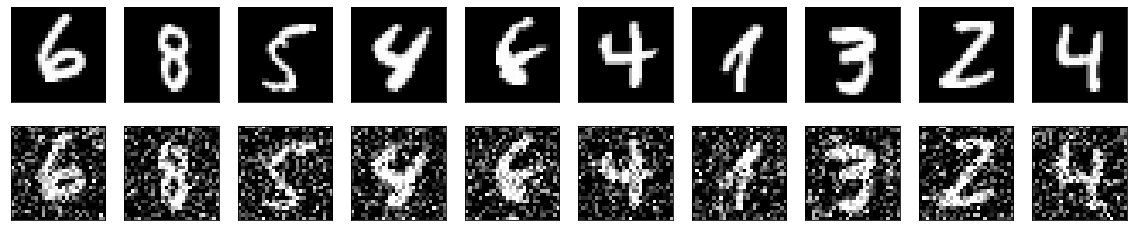

In [33]:
display(xtrain, xtrain_noise)

In [35]:
# build model
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(8, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name=f"autoencoder_encoding_dim_8")

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
    x=xtrain_noise,
    y=xtrain,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(xtest, xtest_noise),
)

Model: "autoencoder_encoding_dim_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_72 (Dense)            (None, 256)               200960    
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 dense_74 (Dense)            (None, 8)                 1032      
                                                                 
 dense_75 (Dense)            (None, 128)               1152      
                                                                 
 dense_76 (Dense)            (None, 256)               33024     
                                                                 
 dense_77 (Dense)            (None, 784)

313/313 [==============================] - 1s 2ms/step


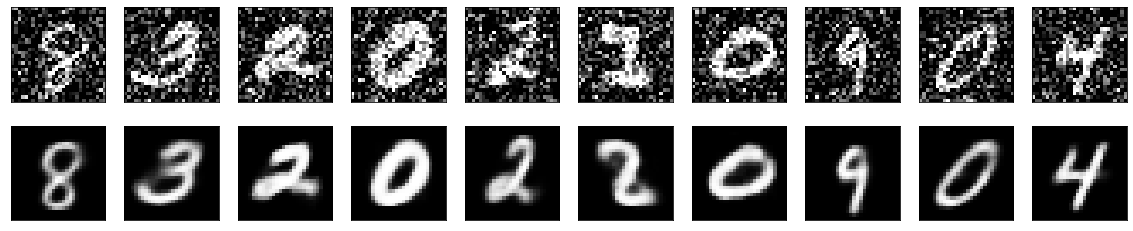

In [36]:
# Print a few noisy images along with the output images to show they don't have noise.
predictions = autoencoder.predict(xtest_noise)
display(xtest_noise, predictions)